## About the Dataset

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

### Source of Simulation

This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.

### Information about the Simulator

I do not own the simulator. I used the one used by Brandon Harris and just to understand how it works, I went through few portions of the code. This is what I understood from what I read:

The simulator has certain pre-defined list of merchants, customers and transaction categories. And then using a python library called "faker", and with the number of customers, merchants that you mention during simulation, an intermediate list is created.

After this, depending on the profile you choose for e.g. "adults 2550 female rural.json" (which means simulation properties of adult females in the age range of 25-50 who are from rural areas), the transactions are created. Say, for this profile, you could check "Sparkov | Github | adults_2550_female_rural.json", there are parameter value ranges defined in terms of min, max transactions per day, distribution of transactions across days of the week and normal distribution properties (mean, standard deviation) for amounts in various categories. Using these measures of distributions, the transactions are generated using faker.

What I did was generate transactions across all profiles and then merged them together to create a more realistic representation of simulated transactions.



#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

#### 2. Load Data

In [2]:
df_test = pd.read_csv('fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df_train = pd.read_csv('fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### 3. Exploratory Data Analysis

In [4]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Extract the date and time components and create new columns
df_train['trans_date'] = df_train['trans_date_trans_time'].dt.date
df_train['trans_time'] = df_train['trans_date_trans_time'].dt.time

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

##### Describe data

In [7]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


##### Missing values

In [9]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
trans_time               0
dtype: int64

In [10]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
#Determine the percentage of fraud and valid transactions in the test dataset
prec_is_fraud_test = round((df_test['is_fraud'].sum()/df_test['is_fraud'].count()) * 100, 2)
prec_is_fraud_test

0.39

In [12]:
#Determine the percentage of fraud and valid transactions in the train dataset
prec_is_fraud_train = round((df_train['is_fraud'].sum()/df_train['is_fraud'].count()) * 100, 2)
prec_is_fraud_train

0.58

#### Univariate Analysis

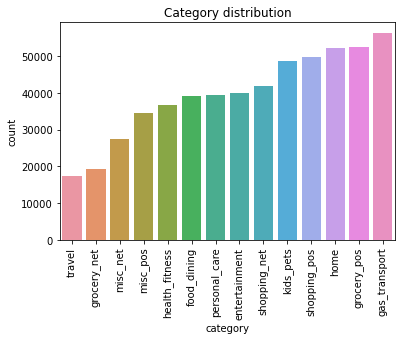

In [13]:
sns.countplot(x = 'category', data = df_test, order=df_test['category'].value_counts(ascending=True).index)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

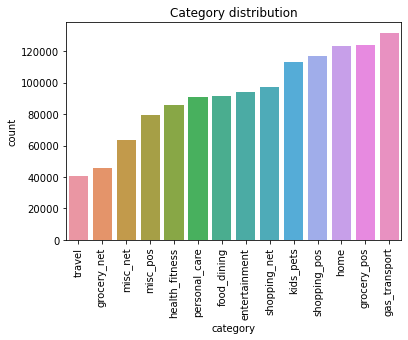

In [14]:
sns.countplot(x = 'category', data = df_train, order=df_train['category'].value_counts(ascending=True).index)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

In [15]:
df_is_fraud_train = df_train[df_train['is_fraud'] == 1]
df_is_fraud_test = df_test[df_test['is_fraud'] == 1]

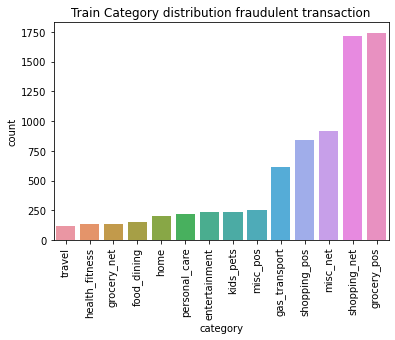

In [16]:
sns.countplot(x = 'category', data = df_is_fraud_train, order=df_is_fraud_train['category'].value_counts(ascending=True).index)
plt.title('Train Category distribution fraudulent transaction')
plt.xticks(rotation=90)
plt.show()

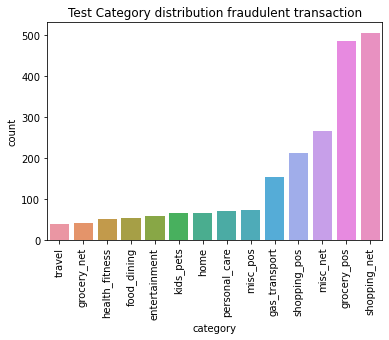

In [17]:
sns.countplot(x = 'category', data = df_is_fraud_test, order=df_is_fraud_test['category'].value_counts(ascending=True).index)
plt.title('Test Category distribution fraudulent transaction')
plt.xticks(rotation=90)
plt.show()

By examining the graph mentioned above, we can see that the test and training dates are similar, with the exception that their count values diverge.

In [18]:
grouped_df = df_is_fraud_train.groupby('category').agg({'category': 'count', 'amt': 'sum'})
grouped_df.columns = ['Count', 'Total Amount']
grouped_df.head()

,Count,Total Amount
category,,
entertainment,233,117323.79
food_dining,151,18131.62
gas_transport,618,7594.11
grocery_net,134,1629.82
grocery_pos,1743,543797.90


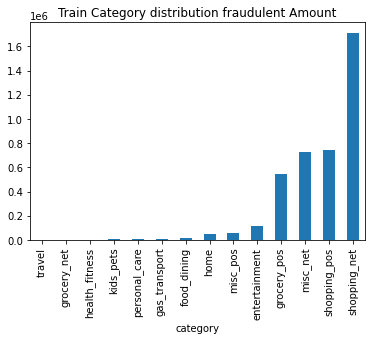

In [19]:
grouped_df.sort_values(by='Total Amount')['Total Amount'].plot(kind='bar')
#sns.displot(grouped_df, x= 'Total Amount')
plt.title('Train Category distribution fraudulent Amount')
plt.xticks(rotation=90)
plt.show()

In [20]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


Text(0, 0.5, 'Frequency')

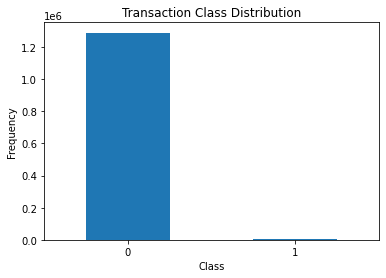

In [21]:
count_classes = pd.value_counts(df_train['is_fraud'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

In [22]:
df_train['trans_year'] = pd.DatetimeIndex(df_train['trans_date']).year
df_train['trans_month'] = pd.DatetimeIndex(df_train['trans_date']).month
df_train['trans_day'] = pd.DatetimeIndex(df_train['trans_date']).day
df_train['trans_hour'] = pd.DatetimeIndex(df_train['trans_date_trans_time']).hour
df_train['trans_minute'] = pd.DatetimeIndex(df_train['trans_date_trans_time']).minute
df_train['trans_second'] = pd.DatetimeIndex(df_train['trans_date_trans_time']).second
df_train['total_second']= (df_train['trans_hour']* 3600) + (df_train['trans_minute']*60) + (df_train['trans_second'])
df_train['dob_year'] = pd.DatetimeIndex(df_train['dob']).year
df_train['dob_month'] = pd.DatetimeIndex(df_train['dob']).month
df_train['dob_day'] = pd.DatetimeIndex(df_train['dob']).day
df_train['cc_num'] = df_train['cc_num'].astype(str)
df_train['len_count_cc_num'] = df_train['cc_num'].apply(len)

df_train.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,total_second,dob_year,dob_month,dob_day,len_count_cc_num
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1,0,0,18,18,1988,3,9,16
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1,0,0,44,44,1978,6,21,12
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1,0,0,51,51,1962,1,19,14
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1,0,1,16,76,1967,1,12,16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1,0,3,6,186,1986,3,28,15


In [23]:
## Get the Fraud and the normal dataset

fraud = df_train[df_train['is_fraud']==1]

normal = df_train[df_train['is_fraud']==0]

In [24]:
print(fraud.shape,normal.shape)

(7506, 36) (1289169, 36)


In [25]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [26]:
normal.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

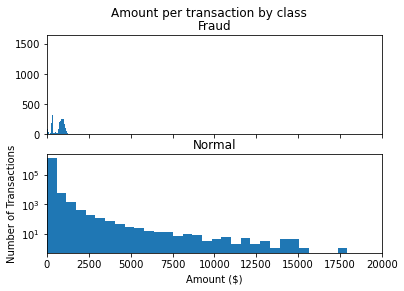

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amt, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

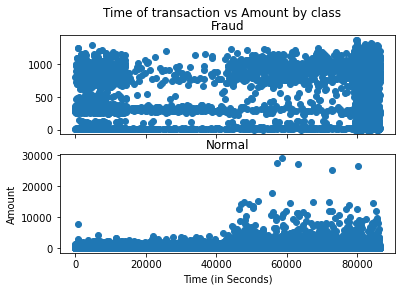

In [28]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.total_second, fraud.amt)
ax1.set_title('Fraud')
ax2.scatter(normal.total_second, normal.amt)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

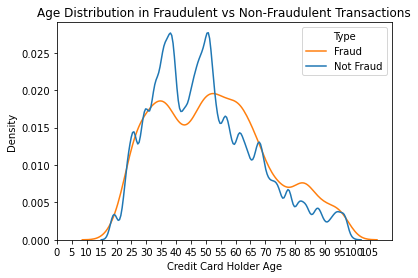

In [29]:
import datetime as dt
df_train['age']=dt.date.today().year-pd.to_datetime(df_train['dob']).dt.year
ax=sns.kdeplot(x='age',data=df_train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Text(0.5, 0, 'Hour of Day')

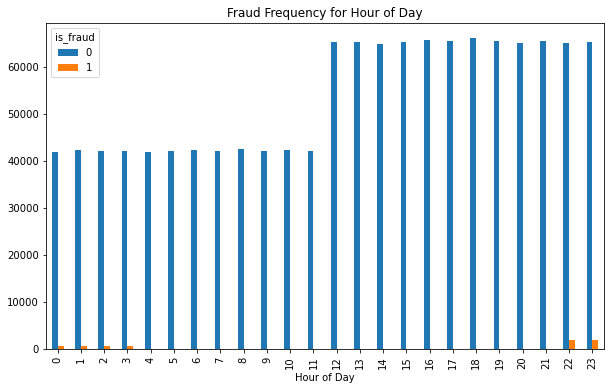

In [30]:
pd.crosstab(df_train['trans_hour'], df_train['is_fraud']).plot(kind='bar', figsize=(10, 6)) # Bar chart
plt.title('Fraud Frequency for Hour of Day')
plt.xlabel('Hour of Day')

Text(0.5, 0, 'Month')

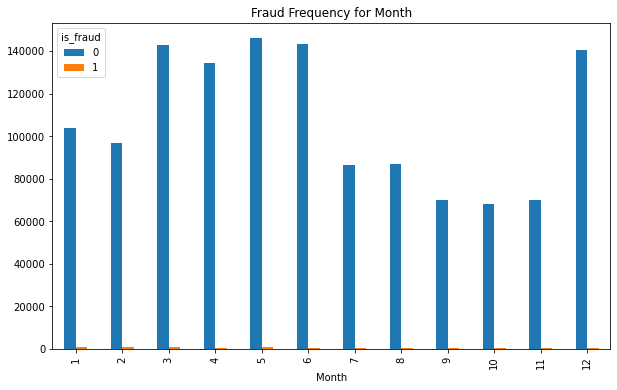

In [31]:
pd.crosstab(df_train['trans_month'], df_train['is_fraud']).plot(kind='bar', figsize=(10, 6)) # Bar chart
plt.title('Fraud Frequency for Month')
plt.xlabel('Month')

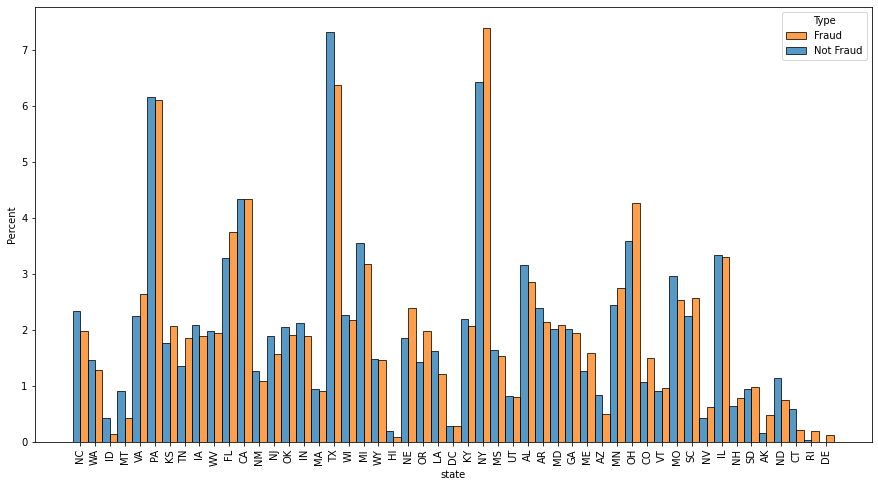

In [32]:
# State vs fraud
f, ax = plt.subplots(figsize=(15, 8))
ax=sns.histplot(x='state',data=df_train, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
plt.xticks(rotation=90)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show();

In [33]:
df_train['date'] = pd.to_datetime(df_train['trans_date'])

df_train['tran_weekday'] = df_train['date'].dt.day_name()

In [34]:
df_drop = ['trans_date_trans_time', 'cc_num', 'lat', 'long', 'trans_num', 'merch_lat', 'merch_long', 'trans_date', 'trans_time', 'street', 'last', 'first', 'city_pop', 'dob', 'unix_time','dob_year', 'dob_month', 'Unnamed: 0', 'dob_day', 'date']
df = df_train.drop(columns=df_drop)
df.head()

,merchant,category,amt,gender,city,state,zip,job,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,total_second,len_count_cc_num,age,tran_weekday
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,"Psychologist, counselling",0,2019,1,1,0,0,18,18,16,35,Tuesday
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,Special educational needs teacher,0,2019,1,1,0,0,44,44,12,45,Tuesday
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,Nature conservation officer,0,2019,1,1,0,0,51,51,14,61,Tuesday
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,Patent attorney,0,2019,1,1,0,1,16,76,16,56,Tuesday
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,Dance movement psychotherapist,0,2019,1,1,0,3,6,186,15,37,Tuesday


In [35]:
bins = [0, 245, 396, 900, 1400]

labels = ['0-20%', '20%-50%', '50%-75%', '75%-100%']

df['amt_group'] = pd.cut(df['amt'], bins=bins, labels=labels)


In [36]:
bins = [0, 20, 40, 60, 80]

labels = ['0-20', '20-40', '40-60', '60-80']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [37]:
bins = [0, 6, 12, 17, 21, 24]

labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']

df['trans_time_classification'] = pd.cut(df['trans_hour'], bins=bins, labels=labels, ordered=False)

In [38]:
distinct_values = df.drop_duplicates(subset=['merchant', 'city', 'state', 'zip', 'job', 'len_count_cc_num'])

In [39]:
distinct_values = df.nunique()
print(distinct_values)

merchant                       693
category                        14
amt                          52928
gender                           2
city                           894
state                           51
zip                            970
job                            494
is_fraud                         2
trans_year                       2
trans_month                     12
trans_day                       31
trans_hour                      24
trans_minute                    60
trans_second                    60
total_second                 86400
len_count_cc_num                 7
age                             81
tran_weekday                     7
amt_group                        4
age_group                        4
trans_time_classification        4
dtype: int64


In [40]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df[df['is_fraud']==1]

Valid = df[df['is_fraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [41]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.005822355331224998
Fraud Cases : 7506
Valid Cases : 1289169


In [42]:
Fraud.head()

,merchant,category,amt,gender,city,state,zip,job,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,total_second,len_count_cc_num,age,tran_weekday,amt_group,age_group,trans_time_classification
2449,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,Soil scientist,1,2019,1,2,1,6,37,3997,13,35,Wednesday,20%-50%,20-40,Night
2472,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,Horticultural consultant,1,2019,1,2,1,47,29,6449,15,63,Wednesday,0-20%,60-80,Night
2523,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,Horticultural consultant,1,2019,1,2,3,5,23,11123,15,63,Wednesday,20%-50%,60-80,Night
2546,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,NC,28611,Soil scientist,1,2019,1,2,3,38,3,13083,13,35,Wednesday,0-20%,20-40,Night
2553,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,TX,78208,Horticultural consultant,1,2019,1,2,3,55,47,14147,15,63,Wednesday,20%-50%,60-80,Night


In [43]:
Fraud_df = Fraud.groupby('category').agg({'category': 'count', 'amt': 'sum'})
Fraud_df.columns = ['Count', 'Total Amount']
Fraud_df['Total Amount'].sum()

3988088.6100000003

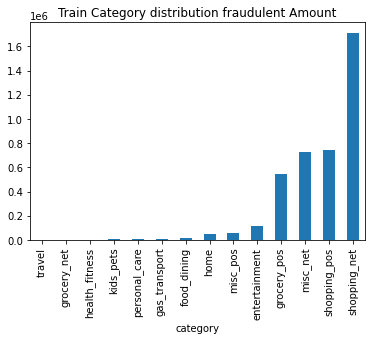

In [44]:
grouped_df.sort_values(by='Total Amount')['Total Amount'].plot(kind='bar')
#sns.displot(grouped_df, x= 'Total Amount')
plt.title('Train Category distribution fraudulent Amount')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Time Classification of Day')

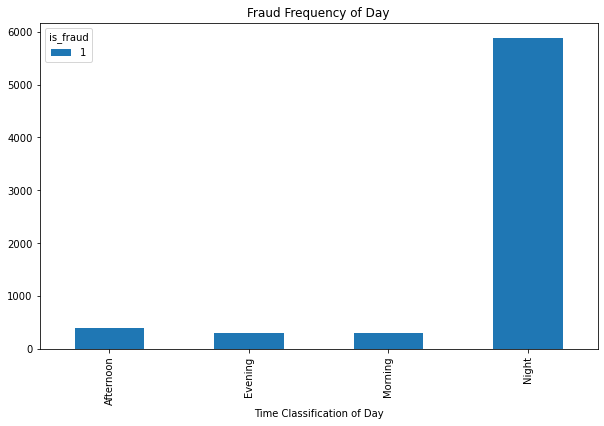

In [45]:
pd.crosstab(Fraud['trans_time_classification'], Fraud['is_fraud']).plot(kind='bar', figsize=(10, 6)) # Bar chart
plt.title('Fraud Frequency of Day')
plt.xlabel('Time Classification of Day')

Text(0.5, 0, 'trans_month')

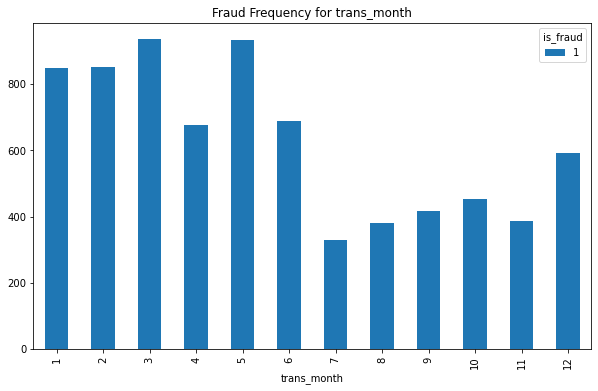

In [46]:
pd.crosstab(Fraud['trans_month'], Fraud['is_fraud']).plot(kind='bar', figsize=(10, 6)) # Bar chart
plt.title('Fraud Frequency for trans_month')
plt.xlabel('trans_month')

### Using Decision Trees

In [47]:
le = LabelEncoder()
df[['merchant_le', 'category_le', 'gender_le', 'city_le', 'state_le', 'zip_le', 'job_le', 'tran_weekday_le', 'amt_group_le', 'age_group_le', 'trans_time_classification_le']] = df[['merchant','category', 'gender', 'city', 'state', 'zip', 'job', 'tran_weekday', 'amt_group', 'age_group', 'trans_time_classification']].apply(le.fit_transform)
df.head()

,merchant,category,amt,gender,city,state,zip,job,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,total_second,len_count_cc_num,age,tran_weekday,amt_group,age_group,trans_time_classification,merchant_le,category_le,gender_le,city_le,state_le,zip_le,job_le,tran_weekday_le,amt_group_le,age_group_le,trans_time_classification_le
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,"Psychologist, counselling",0,2019,1,1,0,0,18,18,16,35,Tuesday,0-20%,20-40,NaN,514,8,0,526,27,265,370,5,0,1,4
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,Special educational needs teacher,0,2019,1,1,0,0,44,44,12,45,Tuesday,0-20%,40-60,NaN,241,4,0,612,47,965,428,5,0,2,4
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,Nature conservation officer,0,2019,1,1,0,0,51,51,14,61,Tuesday,0-20%,60-80,NaN,390,0,1,468,13,858,307,5,0,3,4
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,Patent attorney,0,2019,1,1,0,1,16,76,16,56,Tuesday,0-20%,40-60,NaN,360,2,1,84,26,614,328,5,0,2,4
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,Dance movement psychotherapist,0,2019,1,1,0,3,6,186,15,37,Tuesday,0-20%,20-40,NaN,297,9,1,216,45,231,116,5,0,1,4


In [48]:
drop_list = ['merchant', 'category', 'gender', 'city', 'state', 'zip', 'job', 'tran_weekday', 'amt_group', 'age_group', 'trans_time_classification']
df_1 = df.drop(columns=drop_list)
distinct_values_1 = df_1.nunique()
print(distinct_values_1)

amt                             52928
is_fraud                            2
trans_year                          2
trans_month                        12
trans_day                          31
trans_hour                         24
trans_minute                       60
trans_second                       60
total_second                    86400
len_count_cc_num                    7
age                                81
merchant_le                       693
category_le                        14
gender_le                           2
city_le                           894
state_le                           51
zip_le                            970
job_le                            494
tran_weekday_le                     7
amt_group_le                        5
age_group_le                        5
trans_time_classification_le        5
dtype: int64


In [49]:
df_1.head()

,amt,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,total_second,len_count_cc_num,age,merchant_le,category_le,gender_le,city_le,state_le,zip_le,job_le,tran_weekday_le,amt_group_le,age_group_le,trans_time_classification_le
0,4.97,0,2019,1,1,0,0,18,18,16,35,514,8,0,526,27,265,370,5,0,1,4
1,107.23,0,2019,1,1,0,0,44,44,12,45,241,4,0,612,47,965,428,5,0,2,4
2,220.11,0,2019,1,1,0,0,51,51,14,61,390,0,1,468,13,858,307,5,0,3,4
3,45.00,0,2019,1,1,0,1,16,76,16,56,360,2,1,84,26,614,328,5,0,2,4
4,41.96,0,2019,1,1,0,3,6,186,15,37,297,9,1,216,45,231,116,5,0,1,4


In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
np.random.seed(0)
df_train_n, df_test_n = train_test_split(df_1, train_size=0.7, random_state=100)

In [52]:
df_train_n.shape, df_test_n.shape

((907672, 22), (389003, 22))

In [53]:
df_test_n.head()

,amt,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,total_second,len_count_cc_num,age,merchant_le,category_le,gender_le,city_le,state_le,zip_le,job_le,tran_weekday_le,amt_group_le,age_group_le,trans_time_classification_le
405688,113.19,0,2019,7,3,1,17,35,4655,13,68,345,4,1,412,5,842,309,6,0,3,3
554704,77.40,0,2019,8,25,4,35,14,16514,16,26,550,4,1,494,38,165,313,3,0,1,3
1184524,33.36,0,2020,5,10,5,23,15,19395,16,34,664,3,0,135,24,665,148,3,0,1,3
1117881,137.53,0,2020,4,10,13,46,11,49571,15,64,552,6,1,582,15,472,134,0,0,3,0
23109,65.62,0,2019,1,14,15,48,17,56897,15,41,460,1,1,253,45,213,419,1,0,2,0


In [54]:
y_train = df_test_n.pop("is_fraud")
X_train = df_test_n

y_test = df_train_n.pop("is_fraud")
X_test = df_test_n

In [ ]:
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

In [ ]:
dt_1 = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=10)

In [ ]:
dt_1.fit(X_train, y_train)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt_1, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
#get correlations of each features in dataset
corrmat = df_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Create independent and Dependent Features
columns = df_1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["is_fraud"]]
# Store the variable we are predicting
target = "is_fraud"
# Define a random state
state = np.random.RandomState(42)
X = df_1[columns]
Y = df_1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

## Model Prediction





Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [ ]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1)

}

In [ ]:
type(classifiers)

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### Observations :
Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases